# Data Pre-processing

In [1]:
import os

# data manipulation
import pandas as pd
import numpy as np

# visualiation
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

def read_data():
    dfs=[]
    count_per_station = 0
    for dirname, _, filenames in os.walk('data'):
        for filename in filenames:
            print('Loaded ',os.path.join(dirname, filename))
            df = pd.read_csv(os.path.join(dirname, filename))
            count_per_station = df.shape[0]
            dfs.append(df)
    df_all = pd.concat(dfs,ignore_index=True)
    # Convert year month day to numerical values unit in hour
    df_all = df_all.rename(columns={"No": "time_stamp"})
    # Drop NA rows
    df_all = df_all.dropna()
    ## One hot encoding for wind direction
    dfDummies = pd.get_dummies(df_all['wd'], prefix = 'wd')
    df_all = pd.concat([df_all, dfDummies], axis=1)
    # Drop useless cols
    df_all = df_all.drop(columns=['year', 'month', 'day', 'hour', 'wd'])
    print("%d rows per station, total %d rows" % (count_per_station, df_all.shape[0]))
    return count_per_station, df_all

count, df = read_data()

Loaded  data/PRSA_Data_Gucheng_20130301-20170228.csv
Loaded  data/PRSA_Data_Huairou_20130301-20170228.csv
Loaded  data/PRSA_Data_Tiantan_20130301-20170228.csv
Loaded  data/PRSA_Data_Changping_20130301-20170228.csv
Loaded  data/PRSA_Data_Guanyuan_20130301-20170228.csv
Loaded  data/PRSA_Data_Nongzhanguan_20130301-20170228.csv
Loaded  data/PRSA_Data_Wanliu_20130301-20170228.csv
Loaded  data/PRSA_Data_Dongsi_20130301-20170228.csv
Loaded  data/PRSA_Data_Wanshouxigong_20130301-20170228.csv
Loaded  data/PRSA_Data_Aotizhongxin_20130301-20170228.csv
Loaded  data/PRSA_Data_Dingling_20130301-20170228.csv
Loaded  data/PRSA_Data_Shunyi_20130301-20170228.csv
35064 rows per station, total 382168 rows


In [2]:
df.head(10)

,time_stamp,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,station,wd_E,wd_ENE,wd_ESE,wd_N,wd_NE,wd_NNE,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW
20,21,13.0,25.0,12.0,5.0,1100.0,61.0,1.6,1027.1,-18.4,0.0,1.9,Gucheng,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
21,22,15.0,23.0,14.0,13.0,1200.0,52.0,1.0,1028.1,-17.4,0.0,0.7,Gucheng,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
22,23,16.0,28.0,16.0,19.0,1200.0,45.0,1.3,1028.4,-17.6,0.0,1.0,Gucheng,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23,24,16.0,28.0,14.0,20.0,1100.0,44.0,0.2,1028.6,-17.6,0.0,1.1,Gucheng,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
24,25,14.0,18.0,24.0,43.0,1399.0,25.0,-0.3,1028.9,-18.0,0.0,1.4,Gucheng,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25,26,18.0,39.0,25.0,28.0,1300.0,37.0,-0.7,1029.2,-17.9,0.0,1.0,Gucheng,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26,27,19.0,29.0,30.0,13.0,1100.0,47.0,-0.8,1028.8,-18.0,0.0,1.4,Gucheng,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27,28,15.0,24.0,20.0,12.0,1000.0,46.0,-1.2,1028.6,-17.9,0.0,1.1,Gucheng,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28,29,13.0,16.0,21.0,24.0,1200.0,37.0,-1.3,1028.7,-18.9,0.0,1.1,Gucheng,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
29,30,12.0,23.0,26.0,11.0,1200.0,50.0,-1.3,1028.0,-18.4,0.0,1.4,Gucheng,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
# Check data types
print(df.dtypes)

time_stamp      int64
PM2.5         float64
PM10          float64
SO2           float64
NO2           float64
CO            float64
O3            float64
TEMP          float64
PRES          float64
DEWP          float64
RAIN          float64
WSPM          float64
station        object
wd_E            uint8
wd_ENE          uint8
wd_ESE          uint8
wd_N            uint8
wd_NE           uint8
wd_NNE          uint8
wd_NNW          uint8
wd_NW           uint8
wd_S            uint8
wd_SE           uint8
wd_SSE          uint8
wd_SSW          uint8
wd_SW           uint8
wd_W            uint8
wd_WNW          uint8
wd_WSW          uint8
dtype: object


In [4]:
# Check no null rows
df.isnull().sum()

time_stamp    0
PM2.5         0
PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP          0
PRES          0
DEWP          0
RAIN          0
WSPM          0
station       0
wd_E          0
wd_ENE        0
wd_ESE        0
wd_N          0
wd_NE         0
wd_NNE        0
wd_NNW        0
wd_NW         0
wd_S          0
wd_SE         0
wd_SSE        0
wd_SSW        0
wd_SW         0
wd_W          0
wd_WNW        0
wd_WSW        0
dtype: int64

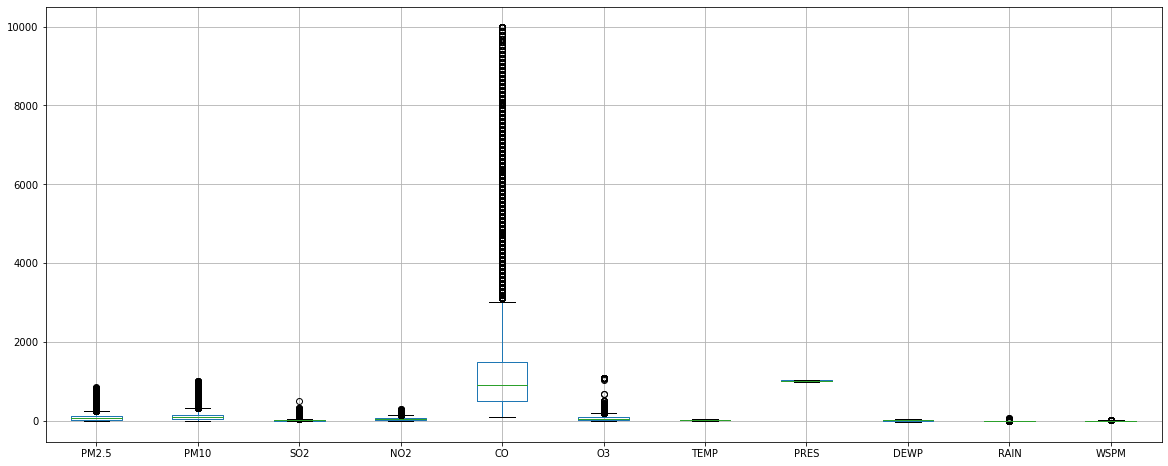

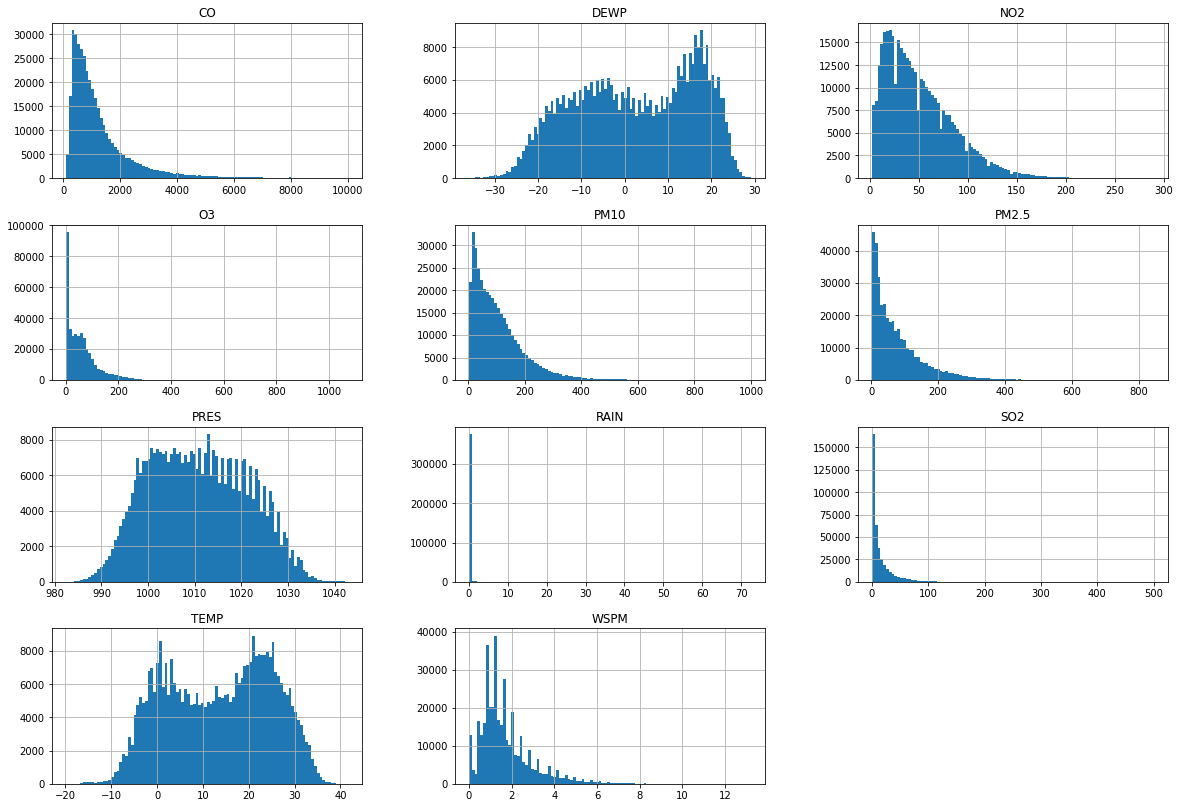

In [13]:
columns_for_plot = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']
df.boxplot(column = columns_for_plot,figsize=[20,8])
df.hist(bins=100,column = columns_for_plot,figsize=[20,14]);